# 1. 행렬과 연산
#### lv.4 
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/118670)

In [55]:
def matrix_print(matrix):
    print('--matrix--')
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(matrix[i][j], end='\t')
        print()

In [64]:
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix = matrix[-n:] + matrix[:-n]
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_u = matrix[0]                                     # 윗행
    outline_r = [matrix[i][-1] for i in range(1, len_h-1)]    # 오른쪽열( 위아래 제외)
    outline_d = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_l = [matrix[i][0] for i in range(len_h-2, 0, -1)] # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = outline_u + outline_r + outline_d + outline_l
    # print(outline_u, outline_r, outline_d, outline_l)
    # print(outline)
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    outline = outline[-n:] + outline[:-n]
    # print(outline, n)
    # 테두리를 상하좌우로 나눈다.
    outline_u = outline[:len_w]
    outline_r = outline[len_w:len_w+len_h-2]
    outline_d = outline[len_w+len_h-2:len_w+len_h-2+len_w][::-1]
    outline_l = outline[len_w+len_h-2+len_w:][::-1]
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline_u               #위쪽 행
    matrix[-1] = outline_d              #아래쪽 행 (다시 역순)
    for i in range(1, len_h-1):
        matrix[i][-1] = outline_r[i-1]  #오른쪽 열
        matrix[i][0] = outline_l[i-1]   #왼쪽 열 (다시 역순)
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    # matrix_print(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
        
    # matrix_print(rc)
    answer = rc
    return answer

In [65]:
matrix = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]]
matrix_print(matrix)
operations = ["Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","Rotate","ShiftRow"]
print(solution(matrix, operations))

--matrix--
1	2	3	
4	5	6	
7	8	9	
10	11	12	
13	14	15	
--matrix--
1	2	3	
4	5	6	
7	8	9	
10	11	12	
13	14	15	
[1, 2, 3] [6, 9, 12] [15, 14, 13] [10, 7, 4]
[1, 2, 3, 6, 9, 12, 15, 14, 13, 10, 7, 4]
[2, 3, 6, 9, 12, 15, 14, 13, 10, 7, 4, 1] 11
--matrix--
2	3	6	
1	5	9	
4	8	12	
7	11	15	
10	13	14	
11 rotate
--matrix--
10	13	14	
2	3	6	
1	5	9	
4	8	12	
7	11	15	
1 shiftrow
--matrix--
10	13	14	
2	3	6	
1	5	9	
4	8	12	
7	11	15	
[[10, 13, 14], [2, 3, 6], [1, 5, 9], [4, 8, 12], [7, 11, 15]]


## 실패
- 효율성 테스트에서 시간초과.
- list의 문제(rc가 매우 큼)
    - 다른 자료구조를 찾아봐야 할듯.

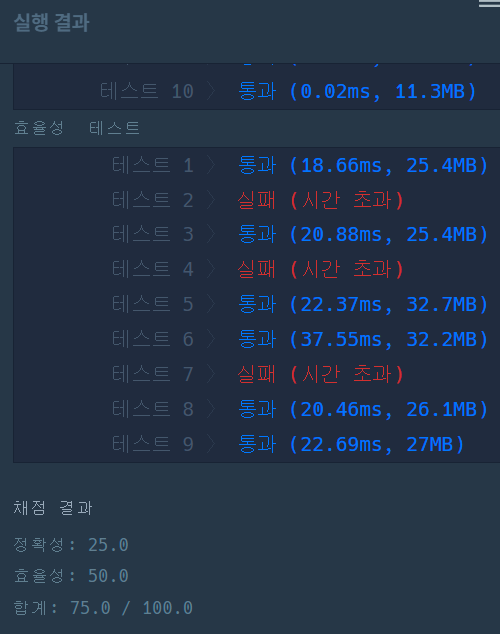

In [73]:
import numpy as np
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix = np.concatenate((matrix[-n:], matrix[:-n]))
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix : np.array, n : int):
    len_h, len_w = matrix.shape # 행렬의 세로, 가로 길이
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_u = matrix[0]                                     # 윗행
    outline_r = matrix[1:-1,-1]                               # 오른쪽열( 위아래 제외)
    outline_d = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_l = matrix[1:-1,0][::-1]                          # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = np.concatenate((outline_u, outline_r, outline_d, outline_l))
    # print(outline_u, outline_r, outline_d, outline_l)
    # print(outline)
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    outline = np.concatenate((outline[-n:], outline[:-n]))
    # print(outline, n)
    # 테두리를 상하좌우로 나눈다.
    outline_u = outline[:len_w]
    outline_r = outline[len_w:len_w+len_h-2]
    outline_d = outline[len_w+len_h-2:len_w+len_h-2+len_w][::-1] # 역순
    outline_l = outline[len_w+len_h-2+len_w:][::-1]              # 역순
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline_u               #위쪽 행
    matrix[1:-1,-1] = outline_r         #오른쪽 열
    matrix[-1] = outline_d              #아래쪽 행
    matrix[1:-1,0] = outline_l          #왼쪽 열
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    rc = np.array(rc)
    operations = np.array(operations)
    # matrix_print(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == operations.size - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
        
    # matrix_print(rc)
    answer = rc.tolist()
    return answer

## 실패
- numpy 배열을 이용한 풀이로 바꾸어봄 
    - 오히려 시간이 더 오래걸림.

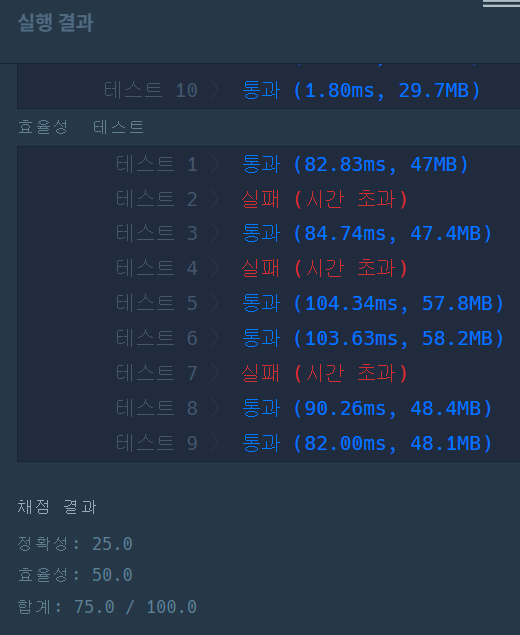

In [109]:
from collections import deque
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix : deque, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    for _ in range(n):
        matrix.appendleft(matrix.pop())
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix : deque, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    
    # 테두리를 하나의 큐로 만든다.
    outline = matrix.popleft() # 윗행
    for i in range(len_h-2):
        outline.append(matrix[i].pop()) # 오른쪽열( 위아래 제외)
    o_d = matrix.pop()
    o_d.reverse()
    outline.extend(o_d) # 아랫행 (역순)
    for i in range(len_h-2-1, 0-1, -1):
        outline.append(matrix[i].popleft()) # 왼쪽열 (위아래 제외, 역순)
    
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    
    # 테두리를 n칸씩 밀어준다.
    for _ in range(n):
        outline.appendleft(outline.pop())
        
    # print(outline, n)
    outline_ = { 'u': deque(), 'r': deque(), 'd': deque(), 'l': deque() }
    # 테두리를 상하좌우로 나눈다.
    for _ in range(len_w):
        outline_['u'].append(outline.popleft())
    for _ in range(len_h-2):
        outline_['r'].append(outline.popleft())
    for _ in range(len_w):
        outline_['d'].appendleft(outline.popleft())
    for _ in range(len_h-2):
        outline_['l'].appendleft(outline.popleft())
        
    # 테두리를 다시 행렬에 넣어준다.
    matrix.appendleft(outline_['u'])        #위쪽 행
    matrix.append(outline_['d'])            #아래쪽 행
    for i in range(1, len_h-1):
        matrix[i].append(outline_['r'].popleft())     #오른쪽 열
        matrix[i].appendleft(outline_['l'].popleft()) #왼쪽 열
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    # matrix_print(rc)
    # 행렬을 deque로 만들어준다.
    for i in range(len(rc)):
        rc[i] = deque(rc[i])
    rc = deque(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
    
    # 행렬을 list로 만들어준다.
    for i in range(len(rc)):
        rc[i] = list(rc[i])
    rc = list(rc)
    # matrix_print(rc)
    return rc

## 실패
- list를 deque로 변환하고 해봄.
    - 처음이 젤 빠름.

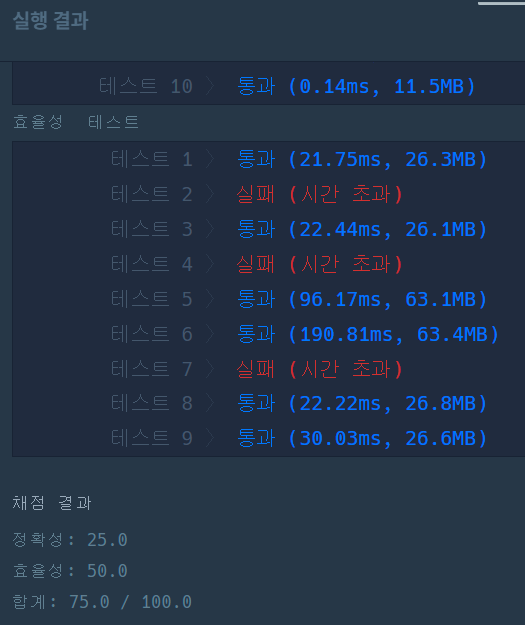

In [111]:
from collections import deque
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix : deque, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix.rotate(n)
    # for _ in range(n):
    #     matrix.appendleft(matrix.pop())
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix : deque, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    
    # 테두리를 하나의 큐로 만든다.
    outline = matrix.popleft() # 윗행
    for i in range(len_h-2):
        outline.append(matrix[i].pop()) # 오른쪽열( 위아래 제외)
    o_d = matrix.pop()
    o_d.reverse()
    outline.extend(o_d) # 아랫행 (역순)
    for i in range(len_h-2-1, 0-1, -1):
        outline.append(matrix[i].popleft()) # 왼쪽열 (위아래 제외, 역순)
    
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    
    # 테두리를 n칸씩 밀어준다.
    outline.rotate(n)
    # for _ in range(n):
    #     outline.appendleft(outline.pop())
        
    # print(outline, n)
    # 테두리를 상하좌우로 넣어준다.
    matrix.appendleft(deque())
    matrix.append(deque())   
    #위쪽 행
    for _ in range(len_w):
        matrix[0].append(outline.popleft())
    # 오른쪽 열
    for i in range(1, len_h-1):
        matrix[i].append(outline.popleft())
    # 아래쪽 행
    for _ in range(len_w):
        matrix[-1].appendleft(outline.popleft())
    # 오른쪽 열
    for i in range(1, len_h-1):
        matrix[i].appendleft(outline.pop())
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    # matrix_print(rc)
    # 행렬을 deque로 만들어준다.
    for i in range(len(rc)):
        rc[i] = deque(rc[i])
    rc = deque(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
    
    # 행렬을 list로 만들어준다.
    for i in range(len(rc)):
        rc[i] = list(rc[i])
    rc = list(rc)
    # matrix_print(rc)
    return rc

## 실패
- deque에 조금더 최적화
    - 여전히 처음보다 느림.

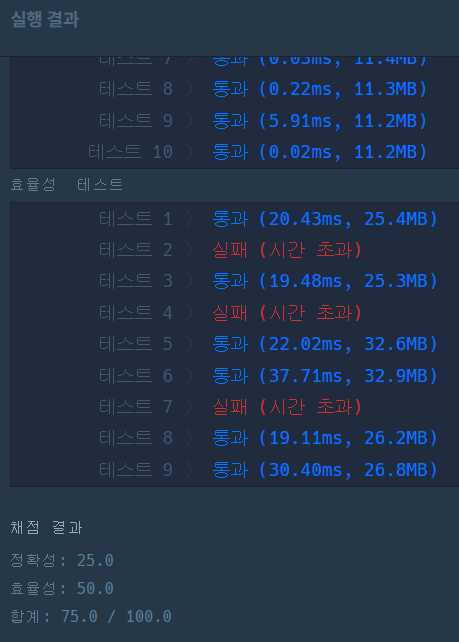

In [128]:
from collections import deque
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix : deque, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len(matrix)
    # matrix의 행을 n칸씩 밀어준다.
    matrix.rotate(n)
    matrix_print(matrix)
    print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
# matrix의 가장 밖의 테두리를 시계방향으로 n칸씩 밀어준다.
def rotate(matrix : deque, n):
    len_h = len(matrix)     # 행렬의 세로 길이
    len_w = len(matrix[0])  # 행렬의 가로 길이
    
    
    outline = deque([deque() for _ in range(4)])
    
    # 테두리를 하나의 큐로 만든다.
    outline[0] = matrix.popleft()           # 윗행
    for i in range(len_h-2):
        outline[1].append(matrix[i].pop())  # 오른쪽열( 위아래 제외)
    outline[2] = matrix.pop()               # 아랫행 (아직 역순 아님)
    for i in range(len_h-2-1, 0-1, -1):
        outline[3].append(matrix[i].popleft()) # 왼쪽열 (위아래 제외, 역순)
    
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len(outline)
    # 테두리를 n칸씩 밀어준다.
    for i in range(n):
        outline[0].appendleft(outline[3].pop())
        outline[1].appendleft(outline[0].pop())
        outline[2].append(outline[1].pop())
        outline[3].appendleft(outline[2].popleft())
    
    # 테두리를 상하좌우로 넣어준다.
    # 위쪽 행
    matrix.appendleft(outline[0])
    # 아래쪽 행
    matrix.append(outline[2])
    # 오른쪽 열, 왼쪽 열
    for i in range(1, len_h-1):
        matrix[i].append(outline[1].popleft())
        matrix[i].appendleft(outline[3].pop())
    matrix_print(matrix)
    print(n, 'rotate')
    return matrix


def solution(rc, operations):
    matrix_print(rc)
    # 행렬을 deque로 만들어준다.
    for i in range(len(rc)):
        rc[i] = deque(rc[i])
    rc = deque(rc)
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
    
    # 행렬을 list로 만들어준다.
    for i in range(len(rc)):
        rc[i] = list(rc[i])
    rc = list(rc)
    matrix_print(rc)
    return rc

In [130]:
matrix = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
# matrix_print(matrix)
operations = ["Rotate","Rotate","Rotate","ShiftRow","ShiftRow"]
print(solution(matrix, operations))

--matrix--
1	2	3	
4	5	6	
7	8	9	
10	11	12	
--matrix--
10	7	4	
11	5	1	
12	8	2	
9	6	3	
3 rotate
--matrix--
12	8	2	
9	6	3	
10	7	4	
11	5	1	
2 shiftrow
--matrix--
12	8	2	
9	6	3	
10	7	4	
11	5	1	
[[12, 8, 2], [9, 6, 3], [10, 7, 4], [11, 5, 1]]


In [ ]:
len_h = 0
len_w = 0
len_o = 0

# shiftrow 연산을 n번 수행하는 함수
def shiftrow(matrix, n):
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len_h
    # n이 0이면 연산을 수행하지 않는다.
    if n == 0: return matrix
    # matrix의 행을 n칸씩 밀어준다.
    matrix = matrix[-n:] + matrix[:-n]
    # matrix_print(matrix)
    # print(n, 'shiftrow')
    return matrix
    
# rotate 연산을 n번 수행하는 함수
def rotate(matrix, n):
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len_o
    # n이 0이면 연산을 수행하지 않는다.
    if n == 0: return matrix
    # 행렬의 바깥 테두리를 리스트로 만든다
    outline_u = matrix[0]                                     # 윗행
    outline_r = [matrix[i][-1] for i in range(1, len_h-1)]    # 오른쪽열( 위아래 제외)
    outline_d = matrix[-1][::-1]                              # 아랫해 (역순)
    outline_l = [matrix[i][0] for i in range(len_h-2, 0, -1)] # 왼쪽열 (위아래 제외, 역순)
    # 테두리를 하나의 리스트로 만든다.
    # 윗줄, 오른쪽줄, 아랫줄, 왼쪽줄 순서로 저장한다.
    outline = outline_u + outline_r + outline_d + outline_l
    # 테두리를 n칸씩 밀어준다.
    outline = outline[-n:] + outline[:-n]
    # print(outline, n)
    # 테두리를 다시 행렬에 넣어준다.
    matrix[0] = outline[:len_w]                                   #위쪽 행
    matrix[-1] = outline[len_w+len_h-2:len_w+len_h-2+len_w][::-1] #아래쪽 행 (다시 역순)
    for i in range(1, len_h-1):
        matrix[i][-1] = outline[len_w:len_w+len_h-2][i-1]         #오른쪽 열
        matrix[i][0] = outline[len_w+len_h-2+len_w:][::-1][i-1]   #왼쪽 열 (다시 역순)
    # matrix_print(matrix)
    # print(n, 'rotate')
    return matrix

def solution(rc, operations):
    global len_h, len_w, len_o
    len_h = len(rc)     # 행렬의 세로 길이
    len_w = len(rc[0])  # 행렬의 가로 길이
    len_o = len_h*2 + len_w*2 - 4 # 테두리의 길이
    
    # 행렬연산을 바로 수행할 수 있도록 함수를 딕셔너리로 만들어준다.
    oper ={ 'Rotate': rotate, 'ShiftRow': shiftrow }
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            rc = oper[op](rc, op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            rc = oper[op](rc, op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
    
    return rc

## 실패
- 처음 시도 코드를 조금 더 최적화.
    - 시간이 조금 줄어듦.
    - 근본적인 해결책이 되지 못할듯.

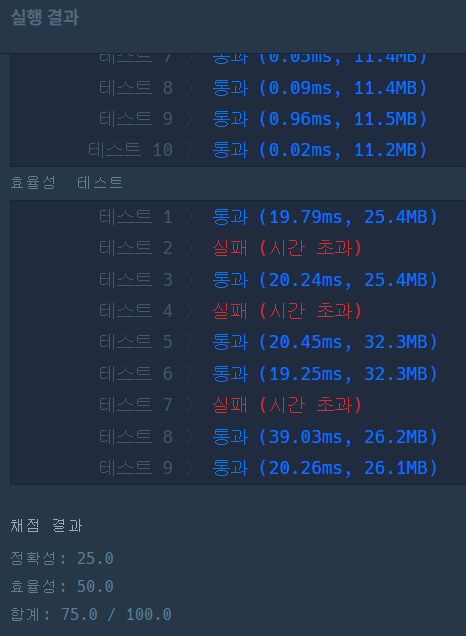

In [133]:
def row_outlins_print(n, oper):
    global rows, outlines
    
    rc = [[outlines[0][i]] + list(rows[i]) + [outlines[1][i]] for i in range(len_h)]
    matrix_print(rc)
    print(n, oper)

In [165]:
from collections import deque
rows = None
outlines = None
len_h = 0
len_w = 0
len_o = 0
# shiftrow 연산을 n번 수행하는 함수
def shiftrow(n):
    global rows, outlines
    # n이 행렬의 크기보다 클 경우, n을 행렬의 크기로 나눈 나머지를 구한다.
    n = n % len_h
    # n만큼 행렬의 행을 밀어준다.
    rows.rotate(n)
    outlines[0].rotate(n)
    outlines[1].rotate(n)
    
    # row_outlins_print(n, 'shiftrow')
    
# rotate 연산을 n번 수행하는 함수
def rotate(n):
    global rows, outlines
    # n이 테두리의 길이보다 클 경우, n을 테두리의 길이로 나눈 나머지를 구한다.
    n = n % len_o
    # print(rows[0], outlines[1], rows[-1], outlines[0])
    # 테두리를 n칸씩 밀어준다.
    for _ in range(n):
        try:
            # 첫 행 -> 마지막 열.
            outlines[1].appendleft(rows[0].pop())
            # 마지막 열 -> 마지막 행.
            rows[-1].append(outlines[1].pop())
            # 마지막 행 -> 첫 열.
            outlines[0].append(rows[-1].popleft())
            # 첫 열 -> 첫 행.
            rows[0].appendleft(outlines[0].popleft())
        except:
            # 열의 갯수가 2개라 rows[0]이 비어있을 경우
            # 열끼리 바꿔준다.
            outlines[0].append(outlines[1].pop())
            outlines[1].appendleft(outlines[0].popleft())
        
    # row_outlins_print(n, 'rotate')
    # print(rows[0], outlines[1], rows[-1], outlines[0])

def solution(rc, operations):
    # matrix_print(rc)
    global len_h, len_w, len_o, rows, outlines
    len_h, len_w = len(rc), len(rc[0])  # 행렬의 세로, 가로 길이
    len_o = len_h*2 + len_w*2 - 4       # 테두리의 길이
    
    # 양 끝 원소를 제외한 행렬을 deque로 만든다.
    rows = deque(deque(r[1:-1]) for r in rc)
    # 행렬의 첫열, 마지막열을 deque로 만든다.
    outlines = [
                deque(r[0] for r in rc), # 첫 열
                deque(r[-1] for r in rc) # 마지막 열
                ]
    # 명령을 딕셔너리로 만든다.
    oper = {'Rotate': rotate, 'ShiftRow': shiftrow}
    # 연산을 수행한다.
    op_count = 0
    for i, op in enumerate(operations):
        # 마지막 연산이면 연산을 수행한다.
        if i == len(operations) - 1:
            op_count += 1
            oper[op](op_count)
            break
        # 다음 연산이 연속된 연산이면 연산 횟수를 늘려주고, 아니면 연산을 수행한다.
        if op == operations[i+1]:
            op_count += 1
        else:
            op_count += 1
            oper[op](op_count)
            op_count = 0    # 연산한뒤 연산횟수를 초기화한다.
            
    # rows, outlines를 다시 행렬로 만든다.
    answer = [[outlines[0][i]] + list(rows[i]) + [outlines[1][i]] for i in range(len_h)]
    # matrix_print(answer)
    return answer

In [166]:
rc = [[1,2],[3,4]]
ops = ["ShiftRow", "Rotate"]
solution(rc, ops)

[[1, 3], [2, 4]]

## 성공
- deque를 이용하는것 까진 맞으나 좀더 효율성을 추구함.
    - shift와 rotate연산을 위해 글로벌 변수로 저장
    - 행별, 첫열과 마지막열을 따로 관리.
        - 원본을 복사/연산/원본에 재대입 -> 원본에 바로 연산
        - 각 연산은 deque를 이용하면 모두 O(1)
        - rc가 큰 경우 복사/재대입 과정이 없어져 효율성 통과
- 질문 게시판에서 힌트를 봄. 행과 열을 따로 관리한다는 힌트 확인.

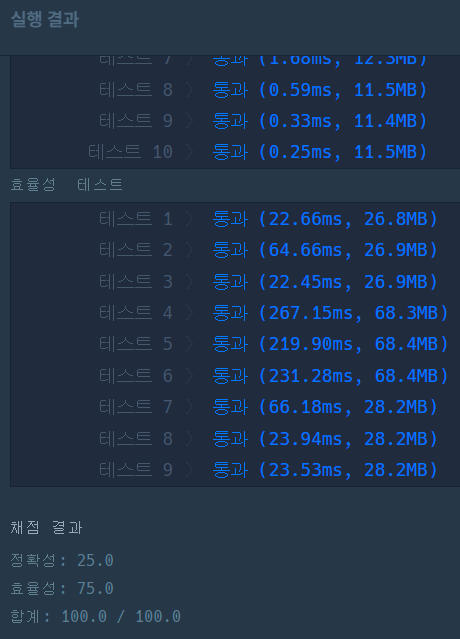